In [1]:
import cv2 as cv
import tensorflow as tf
import sklearn as sk
print ("CV = ",cv.__version__)
print ("TF = ",tf.__version__)
print ("SKlearn = ",sk.__version__)

CV =  4.5.3
TF =  2.3.0
SKlearn =  0.24.2


Q1.1

In [2]:
from skimage import io

im_gray = io.imread('grizzlypeakg.png')
B = im_gray <= 10 # B is now a binary logical array, where for all i, j, B[i][j] = 1 if and only if im_gray[i][j] <= 10, otherwise, B[i][j] = 0
im_gray[B] = 0

Q1.2

In [3]:
import numpy as np
from skimage import io
import time

total1 = 0
x = 100

for i in range(x):
    im_gray = io.imread('grizzlypeakg.png')

    start = time.time()

    B = im_gray <= 10# B is now a binary logical array, where for all i, j, B[i][j] = 1 if and only if im_gray[i][j] <= 10, otherwise, B[i][j] = 0
    im_gray[B] = 0

    end = time.time()
    
    total1 += (end - start)# Total1 records the total time for the operation, ignoring file loading time

print("Sped-up Version with Grayscale Image:")
print("Total time of running with {} images: {:.5f}. \nAverage time of running with 1 image: {:.5f}".format(x, total1, total1/x))
print()


total2 = 0
y = 10

for i in range(y):
    im_gray1 = io.imread('grizzlypeakg.png')
    
    start = time.time()

    (m1,n1) = im_gray.shape 
    for i in range(m1): 
        for j in range(n1): 
            if im_gray[i,j] <= 10 :
                im_gray[i,j] = 0

    end = time.time()
    total2 += (end - start)# Total2 records the total time for the operation, ignoring file loading time
    
print("Slow Version with Grayscale Image:")
print("Total time of running with {} images: {:.5f}. \nAverage time of running with 1 image: {:.5f}".format(y, total2, total2/y))
print()


print("The speed up factor for Grayscale image would be: {:.3f}".format((total2/y) / (total1/x)))

Sped-up Version with Grayscale Image:
Total time of running with 100 images: 0.42809. 
Average time of running with 1 image: 0.00428

Slow Version with Grayscale Image:
Total time of running with 10 images: 40.25405. 
Average time of running with 1 image: 4.02541

The speed up factor for Grayscale image would be: 940.315


Q1.3

In [4]:
total1 = 0
x = 100
for i in range(x):
    im_gray1 = io.imread('grizzlypeak.jpg')

    start = time.time()
    
    redChannel = im_gray1[:,:,0]# Red Channel
    greenChannel = im_gray1[:,:,1]# Green Channel
    blueChannel = im_gray1[:,:,2]# Blue Channel

    R = redChannel <= 10# R is now a binary logical array, where for all i, j, R[i][j] = 1 if and only if redChannel[i][j] <= 10, otherwise, R[i][j] = 0
    redChannel[R] = 0
    
    G = greenChannel <= 10# G is now a binary logical array, where for all i, j, G[i][j] = 1 if and only if greenChannel[i][j] <= 10, otherwise, G[i][j] = 0
    greenChannel[G] = 0
    
    B = blueChannel <= 10# B is now a binary logical array, where for all i, j, B[i][j] = 1 if and only if blueChannel[i][j] <= 10, otherwise, B[i][j] = 0
    blueChannel[B] = 0

    reCombinedImg = np.stack((redChannel, greenChannel, blueChannel), axis = 2)
    
    end = time.time()
    
    total1 += (end - start)# Total1 records the total time for the operation, ignoring file loading time
    
print("Sped-up Version with RGB Image:")
print("Total time of running with {} images: {:.5f}. \nAverage time of running with 1 image: {:.5f}".format(x, total1, total1/x))
print()


total2 = 0
y = 10

for i in range(y):
    im_gray1 = io.imread('grizzlypeak.jpg')
    
    start = time.time()

    redChannel = im_gray1[:,:,0]# Red Channel
    greenChannel = im_gray1[:,:,1]# Green Channel
    blueChannel = im_gray1[:,:,2]# Blue Channel
    
    (m1,n1) = im_gray.shape
    
    for i in range(m1): 
        for j in range(n1): 
            if redChannel[i,j] <= 10 :
                redChannel[i,j] = 0
            if greenChannel[i,j] <= 10 :
                greenChannel[i,j] = 0
            if blueChannel[i,j] <= 10 :
                blueChannel[i,j] = 0

    end = time.time()
    total2 += (end - start)# Total2 records the total time for the operation, ignoring file loading time
    
print("Slow Version with RGB Image:")
print("Total time of running with {} images: {:.5f}. \nAverage time of running with 1 image: {:.5f}".format(y, total2, total2/y))
print()

print("The speed up factor for RGB image would be: {:.3f}".format((total2/y) / (total1/x)))

Sped-up Version with RGB Image:
Total time of running with 100 images: 1.84141. 
Average time of running with 1 image: 0.01841

Slow Version with RGB Image:
Total time of running with 10 images: 118.44265. 
Average time of running with 1 image: 11.84426

The speed up factor for RGB image would be: 643.216


Q2.1

With this approach, it opened 'gigi.jpg' with float32, in this case, all entries are of values in range[0, 1].
Hence, with I = I - 50, there would be a problem, and causing the error.
So, if want to maintain the same intended brightness reduction, could open with ubyte so that all entries are of values in range [0, 255]

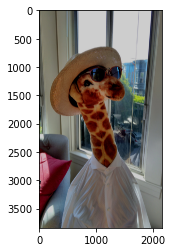

In [5]:
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np
from skimage import img_as_ubyte

I = img_as_ubyte(io.imread('gigi.jpg'))
I[I<50] = 0# Because all entries are of values in range[0, 255], so it can't reach values below 0
I[I>=50] -= 50 
plt.imshow(I)
plt.show()